# <u> Tutorial 5: Statistics and Random Number Generation</u>


<br> This series of tutorials is intended to teach the basics of Python for scientific programming. These tutorials were written by Sanjana Kulkarni, an intern in the High Throughput Analytics group during summer 2021. 

Performing statistical analyses is necessary for the reproducibility of science. In the pharamaceutical industry, reproducibility is crucial to producing a product because protocols and formulations must be relatively constant in every batch and at all times. In this tutorial, we will discuss some techniques for generating random numbers, developing simulations, and performing statistical analyses in Python. 

The most important packages that you will need are

1. `numpy`: random number generation and many other functions
1. `scipy`: statistical tests 

In [1]:
import numpy as np
import scipy

# plotting packages
import matplotlib.pyplot as plt

import bokeh.io
import bokeh.plotting

bokeh.io.output_notebook()

Loading BokehJS ...

## Curve Fitting

Curve fitting is the process of fitting a known mathematical function to a set of data. Models have been developed using theory to explain certain processes, which are then validated using experimental data. 

For example, empirical models have been developed that demonstrate that population growth is exponential up to the carrying capacity of an environment. If given enough space and food, organisms -- everything from bacteria to humans -- will multiply indefinitely. 

The exponential model for population growth is as follows, where $N_0$ is the population at time $0$, and $k$ is a growth rate constant. 

$$N(t) = N_0 e^{kt}$$

We can obtain data for the number of cells (or cell concentration or density) over time and see if it approximately fits an exponential curve. 

To do this, we will go through the following steps:

1. Randomly sample data from a certain distribution with defined parameters.
2. Add noise to the sampled data.
3. Fit a best fit curve to the data to see how well the resulting parameters match the original distribution.

We will now go through random number generation and sampling from distributions to implement these steps.

## Random Number Generation

`numpy` has excellent support for generating random numbers and performing simulations. Another package, `random`, has useful functions as well, but more things can be done with `numpy`, so I stick with it for all of my simulations. 

The simplest function is `numpy.random.rand()`. This draws numbers from the <b>uniform distribution</b> between $0$ and $1$. Uniform means that all numbers have an equal probability of being drawn. You can add a keyword argument to specify how many times you want to draw (the default is one).

In [2]:
# draw a single number between 0 and 1
np.random.rand()

0.8726613001316702

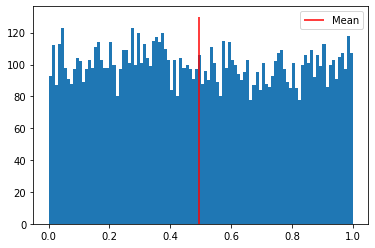

Empirical mean: 0.495392


In [40]:
# draw 10000
rand_unif = np.random.rand(10000)

# plot them, with 100 bins
plt.hist(rand_unif, bins=100)

# draw a red line for the mean
plt.vlines(np.mean(rand_unif), 0, 130, color="red", label="Mean")

# add a legend
plt.legend()

plt.show()

# print the empirical mean
print(f"Empirical mean: {round(np.mean(rand_unif), 6)}")

The distribution looks approximately uniform because all the numbers have similar counts. The more samples you draw, the more the empirical distribution will look like the theoretical uniform distribution, which is a horizontal line. As expected, the mean is the center value. 

If you pass in more arguments to the `np.random.rand()` function, it will return a matrix-like array of values, based on the dimensions. 

In [11]:
# return a 3 x 2 x 3 array of randomly generated values
np.random.rand(3, 2, 3)

array([[[0.36426882, 0.55098358, 0.95268181],
        [0.01093666, 0.50154964, 0.73298833]],

       [[0.92184618, 0.61463476, 0.12328433],
        [0.74917463, 0.75438703, 0.82466874]],

       [[0.95600734, 0.1674735 , 0.62461417],
        [0.47249083, 0.04498677, 0.29144281]]])

## Sampling from Distributions

Sampling from known distributions is important for simulations. Common distributions are the normal, exponential, uniform (already seen above), binomial, and poisson. A comprehensive list of probability distributions, their parameters, and widgets to explore how the parameters graphically affect the distributions can be found <a href="https://distribution-explorer.github.io/" target="blank">here</a>. It was written by <a href="http://bois.caltech.edu/" target="blank">Justin Bois</a>, a professor at Caltech.

The call signatures of these probability distributions in `numpy` are similar to `np.random.rand`. However, because these distributions have parameters, they will be the first aruments. The size arguments follow. For all distributions, it is imperative to check the documentation to know the order of parameters. Otherwise, the distribution could be much different than you expect. You can search for the documentation online, or type the function name followed by a `?` symbol. For example. `np.random.normal?` will return a description of the function and its arguments. 

For the normal distribution, the first parameter is the mean, followed by the standard deviation. The following code draws 10000 samples from a normal distribution with mean = $10$ and standard deviation = $3$. We can plot it and verify the mean and standard deviation of the samples.

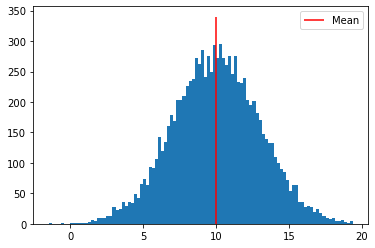

Empirical mean: 10.007416, 
 Empirical St. Dev.: 2.966242


In [33]:
norm_samples = np.random.normal(10, 3, 10000)

# plot them, with 100 bins
plt.hist(norm_samples, bins=100)

# draw a red line for the mean
plt.vlines(np.mean(norm_samples), 0, 340, color="red", label="Mean")

# add a legend
plt.legend()

plt.show()

# print the empirical values
print(f"Empirical mean: {round(np.mean(norm_samples), 6)}, \n Empirical St. Dev.: {round(np.std(norm_samples), 6)}")

Since we are interested in fitting a curve to the exponential distribution, we will first sample 10000 points. In numpy, the exponential distribution is parameterized by its mean. Then we add some noise to the data. 

Often, noise is normally distributed -- small fluctuations from the true underlying distribution are more likely than large ones, and the error terms can be in both directions. To take this into account, we can simply draw the same number of points from a normal distribution and add it to our points. 

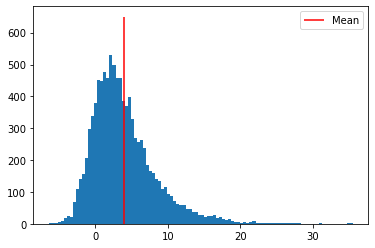

Empirical mean: 3.95931


In [47]:
# number of samples
N = 10000

def exponential_func(x, N_0, k):
    
    return N_0 * np.exp(k * x)

# exponential distribution with mean = 4
data = np.random.exponential(4, N)

# add Gaussian noise, mean = 0, standard deviation = 2
noisy_data = data + np.random.normal(0, 2, N)

# plot them, with 100 bins
plt.hist(noisy_data, bins=100)

# draw a red line for the mean
plt.vlines(np.mean(noisy_data), 0, 650, color="red", label="Mean")

# add a legend
plt.legend()

plt.show()

# print the empirical mean
print(f"Empirical mean: {round(np.mean(noisy_data), 6)}")

We see that the empirical mean is pretty similar to the theoretical mean. We can plot 

## Statistical Tests in Scipy